In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [13]:
def load_dataset(folder_path):
    images = []
    labels = []
    class_labels = {}
    class_count = 0

    for class_name in os.listdir(folder_path):
        class_labels[class_count] = class_name
        class_folder = os.path.join(folder_path, class_name)

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize images to a common size
            images.append(img)
            labels.append(class_count)

        class_count += 1

    return np.array(images), np.array(labels), class_labels

In [16]:
dataset_folder =r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized"
images, labels, class_labels = load_dataset(dataset_folder)

In [17]:
images = images / 255.0

In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_labels), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(images, labels, epochs=10, validation_split=0.2)

MemoryError: Unable to allocate 7.77 GiB for an array with shape (6931, 224, 224, 3) and data type float64

In [25]:
# Update these lines with the correct path to your dataset
train_generator = datagen.flow_from_directory(
    r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized",  # Update this line
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized",  # Update this line
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6966 images belonging to 100 classes.
Found 1698 images belonging to 100 classes.


In [26]:
# Assuming you have already defined and compiled your model

# Specify the number of epochs
epochs = 10

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# After training, you can access the training history
# and use it for plotting or further analysis
print("Training history:", history.history)


Epoch 1/10




InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\Jeevesh Narayan\AppData\Local\Temp\ipykernel_10480\936535383.py", line 7, in <module>

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,100] and labels shape [3200]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1430]

In [27]:
# Update class_mode to 'sparse' in both train_generator and validation_generator
train_generator = datagen.flow_from_directory(
    r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # Update this line
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # Update this line
    subset='validation'
)


Found 6966 images belonging to 100 classes.
Found 1698 images belonging to 100 classes.


In [28]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/10
218/218 [==============================] - 196s 895ms/step - loss: 4.5882 - accuracy: 0.0135 - val_loss: 4.4693 - val_accuracy: 0.3504
Epoch 2/10
218/218 [==============================] - 195s 893ms/step - loss: 4.1333 - accuracy: 0.0148 - val_loss: 3.8145 - val_accuracy: 0.0630
Epoch 3/10
218/218 [==============================] - 205s 940ms/step - loss: 3.2602 - accuracy: 0.0111 - val_loss: 3.5258 - val_accuracy: 0.0954
Epoch 4/10
218/218 [==============================] - 199s 915ms/step - loss: 2.1945 - accuracy: 0.0113 - val_loss: 3.5124 - val_accuracy: 0.0188
Epoch 5/10
218/218 [==============================] - 199s 913ms/step - loss: 1.1190 - accuracy: 0.0116 - val_loss: 4.1562 - val_accuracy: 0.0489
Epoch 6/10
218/218 [==============================] - 199s 913ms/step - loss: 0.4439 - accuracy: 0.0106 - val_loss: 5.4857 - val_accuracy: 0.0306
Epoch 7/10
218/218 [==============================] - 199s 911ms/step - loss: 0.1766 - accuracy: 0.0106 - val_loss: 6.5136 -

In [29]:
model.save("celebrity_face_recognition_model.h5")

C:\Users\Jeevesh Narayan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
import matplotlib.pyplot as plt
def predict_celebrity(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0) / 255.0
    loaded_model = tf.keras.models.load_model("celebrity_face_recognition_model.h5")
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Input Image")
    plt.axis('off')
    plt.show()
    predicted_class_folder = os.path.join(r"C:\Users\Jeevesh Narayan\jeevesh_bcs1\Bollywood_celeb_face_localized", class_labels[predicted_class])
    if os.path.exists(predicted_class_folder):
        predicted_image_file = next(iter(os.listdir(predicted_class_folder)), None)
        if predicted_image_file:
            predicted_image_path = os.path.join(predicted_class_folder, predicted_image_file)
            predicted_img = cv2.imread(predicted_image_path)
            if predicted_img is not None:
                plt.imshow(cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB))
                plt.title(f"Predicted Celebrity: {class_labels[predicted_class]}")
                plt.axis('off')
                plt.show()
            else:
                print(f"Error: Unable to read the predicted celebrity image at {predicted_image_path}.")
        else:
            print(f"Warning: The predicted celebrity class folder '{predicted_class_folder}' is empty.")
    else:
        print(f"Warning: Could not find the predicted celebrity class folder at {predicted_class_folder}")

1/1 [==============================] - 0s 132ms/step


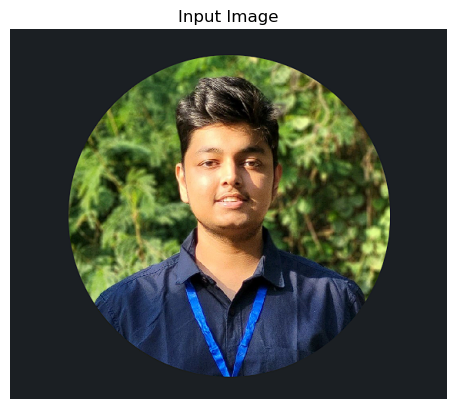

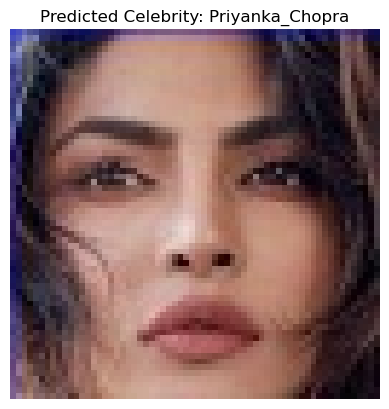

In [33]:
new_image_path =r"C:\Users\Jeevesh Narayan\Pictures\Screenshots\Screenshot 2023-12-30 172235.png"
predict_celebrity(new_image_path)